# Aplicar técnicas de Mineração de Dados, utilizando o algoritmo de Clusterização para agrupar as informações e notas dos candidatos

## Área de agrupamentos: Matemática; Fundamentos da Computação; Tecnologias da Computação


In [1]:
%run ../services/imports.py
from services.function import Function

## Descrição dos dados

In [2]:
dados = pd.read_csv('../dados/processed/dados_poscomp_completo_test.csv')
# dados = dados.drop(columns='INSCRICAO')
dados.head()

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano,linhas_pesquisas,area_concentration
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,14.0,21.0,10.0,2016,sistemas de informação,informatica
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,16.0,22.0,12.0,2016,engenharia de software,informatica
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016,engenharia de software,informatica
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016,sistemas de informação,informatica
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,6.0,15.0,11.0,2016,inteligência artificial,computacao


> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|1|Masculino|
|0|Feminino|

> ### UF
> ***

|Código|Descrição|
|---|---|
|0|AC|
|1|AL|
|2|AP|
|3|AM|
|4|BA|
|5|CE|
|6|DF|
|7|ES|
|8|GO|
|9|MA|
|10|MT|
|11|MS|
|12|MG|
|13|PA|
|14|PB|
|15|PR|
|16|PE|
|17|PI|
|18|RJ|
|19|RN|
|20|RS|
|21|RO|
|22|RR|
|23|SC|
|24|SP|
|25|SE|
|26|TO|

> ### Cargo
> ***

|Código|Descrição|
|---|---|
|0|Mestrado/Doutorado|
|1|Autoavaliação|

> ### Região
> ***

|Código|Descrição|
|---|---|
|0|norte|
|1|nordeste|
|2|centro_oeste|
|3|sudeste|
|4|sul|

> ### Situação
> ***

|Código|Descrição|
|---|---|
|0|Ausente|
|1|Presente|

## Analise Explorária dos Dados

Quantas pessoas são do sexo masculino e feminino

In [3]:
frequencia_sexo = dados['sexo'].value_counts() 

percentual_sexo = dados['sexo'].value_counts(normalize = True) * 100 

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentagem (%)': percentual_sexo.round(2)})
dist_freq_qualitativas.rename (index = {'masculino': 'Masculino', 'feminino': 'Feminino', 3: 'Total'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
sexo,,
Masculino,11187,83.01
Feminino,2290,16.99


Qual a média, mediana e máximo?

In [4]:
estados = {
    0: 'Acre',
    1: 'Alagoas',
    2: 'Amapá',
    3: 'Amazonas',
    4: 'Bahia',
    5: 'Ceará',
    6: 'Distrito Federal',
    7: 'Espírito Santo',
    8: 'Goiás',
    9: 'Maranhão',
    10: 'Mato Grosso',
    11: 'Mato Grosso do Sul',
    12: 'Minas Gerais',
    13: 'Pará',
    14: 'Paraíba',
    15: 'Paraná',
    16: 'Pernambuco',
    17: 'Piauí',
    18: 'Rio de Janeiro',
    19: 'Rio Grande do Norte',
    20: 'Rio Grande do Sul',
    21: 'Rondônia',
    22: 'Roraima',
    23: 'Santa Catarina',
    24: 'São Paulo',
    25: 'Sergipe',
    26: 'Tocantins'
}


In [5]:
regioes = {
    0: 'Norte',
    1: 'Nordeste',
    2: 'Centro-Oeste',
    3: 'Sudeste',
    4: 'Sul'
}

In [6]:
# renda_estatisticas_por_uf = dados.groupby(['estado']).agg({'matematica': ['mean', 'median', 'max', 'std'],
#                                                             'fund_computacao': ['mean', 'median', 'max', 'std'],
#                                                             'tec_computacao': ['mean', 'median', 'max', 'std']})
# renda_estatisticas_por_uf.rename(index= estados)

#### Geração de gráficos da áreas de matemática, fundamentos da computação e tecnologia da computação

In [7]:
# media_estatisticas_por_uf = dados.groupby(['estado']).agg({'matematica': ['mean'],
#                                                             'fund_computacao': ['mean'],
#                                                             'tec_computacao': ['mean']})
# media_estatisticas_por_uf = media_estatisticas_por_uf.rename(index=estados_brasileiros)

NameError: name 'estados_brasileiros' is not defined

In [ ]:
# por_sexo_estado = dados.groupby(['estado', 'sexo']).size().reset_index(name='candidatos')

# por_sexo_estado['estado'] = por_sexo_estado['estado'].replace(estados_brasileiros)
# por_sexo_estado['sexo'] = por_sexo_estado['sexo'].replace({'feminino': 'Feminino', 'masculino': 'Masculino'})

# total_inscritos_sexo = por_sexo_estado['candidatos'].sum()

# # Calcula a porcentagem de candidatos inscritos por região
# por_sexo_estado['porcentagem'] = (por_sexo_estado['candidatos'] / total_inscritos_sexo) * 100
# por_sexo_estado

In [ ]:
# renda_estatisticas_por_regiao = dados.groupby(['regiao']).agg({'matematica': ['mean', 'median', 'max', 'std'],
#                                                               'fund_computacao': ['mean', 'median', 'max', 'std'],
#                                                               'tec_computacao': ['mean', 'median', 'max', 'std']})
# renda_estatisticas_por_regiao.rename(index= regioes)

In [13]:
dados_teste = dados.copy()

## K-means

In [14]:
from sklearn.cluster import KMeans

In [15]:
dados_teste.head()

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano,linhas_pesquisas,area_concentration
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,14.0,21.0,10.0,2016,sistemas de informação,informatica
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,16.0,22.0,12.0,2016,engenharia de software,informatica
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016,engenharia de software,informatica
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016,sistemas de informação,informatica
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,6.0,15.0,11.0,2016,inteligência artificial,computacao


In [17]:
dados_teste['idade'] = dados_teste.apply(Function.calculate_age, axis=1)

In [91]:
dataset_kmeans = dados_teste.drop(columns={'ano', 'presença', 'cargo'})
dataset_kmeans.head()

,idade,sexo,estado,especialidade,matematica,fund_computacao,tec_computacao,linhas_pesquisas,area_concentration
0,27,masculino,ce,teoria da computação,14.0,21.0,10.0,sistemas de informação,informatica
1,21,masculino,rs,metodologias e técnicas de computação,16.0,22.0,12.0,engenharia de software,informatica
2,25,masculino,sp,engenharia de software,4.0,16.0,8.0,engenharia de software,informatica
3,30,masculino,pa,sistemas de informação,4.0,13.0,7.0,sistemas de informação,informatica
4,19,feminino,am,computação gráfica,6.0,15.0,11.0,inteligência artificial,computacao


### Padronizando os dados

In [92]:
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

categorical_columns = ['sexo','estado','especialidade', 'area_concentration','linhas_pesquisas']
X_dataset = encode_categorical_columns(dataset_kmeans, categorical_columns)

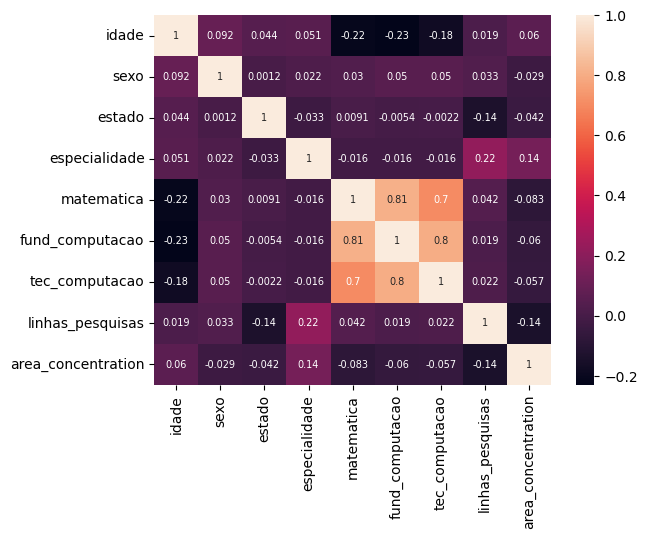

In [107]:
sns.heatmap(X_dataset.corr(), annot=True,annot_kws={"size": 7})
plt.show()

In [81]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_dataset = min_max_scaler.fit_transform(X_dataset)

### Encontrar o número ideal de cluster

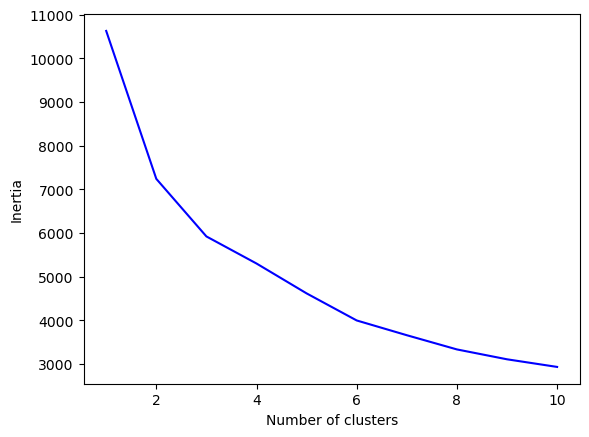

In [82]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset)

    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

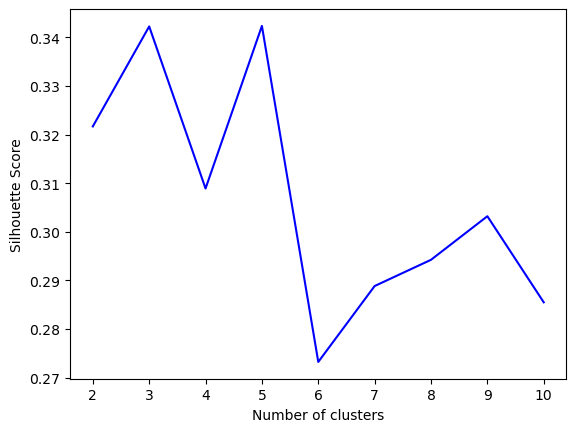

In [83]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset)

    score = silhouette_score(X_dataset, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

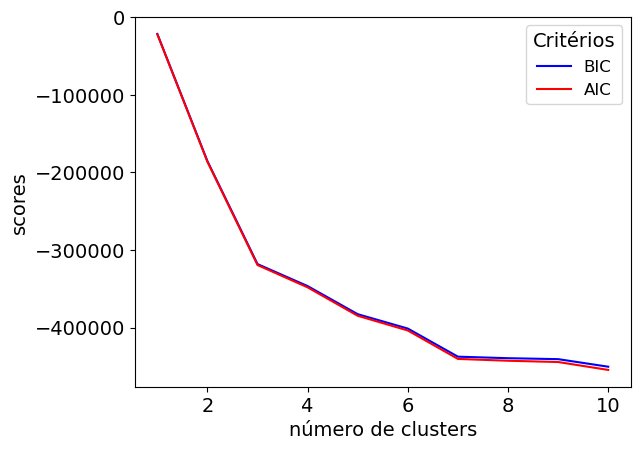

In [84]:
from sklearn.mixture import GaussianMixture

bic_values = []
aic_values = []

sns.set_palette(["blue", "red"])

for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_dataset)
    

    bic_values.append(gmm.bic(X_dataset))
    aic_values.append(gmm.aic(X_dataset))

plt.plot(range(1, 11), bic_values, label="BIC")
plt.plot(range(1, 11), aic_values, label="AIC")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('scores', fontsize=14)
plt.xlabel('número de clusters', fontsize=14)
legend = plt.legend(title='Critérios', fontsize=12)
legend.get_title().set_fontsize(14)
# plt.savefig('imagens/metodoBIC_AIC.eps', dpi=400, bbox_inches='tight', format='eps')
plt.show()

In [85]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init='auto',max_iter=300,init='k-means++')
    kmeans.fit(X_dataset)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

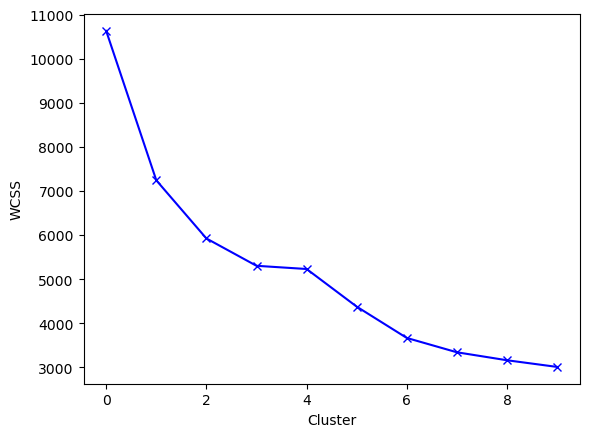

In [86]:
plt.plot(wcss, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

### Aplicação do K-meas

In [49]:
# param_grid = {
#     'n_clusters': [3, 4, 5, 6],
#     'init': ['k-means++', 'random'],
#     'n_init': [5, 10, 15],
#     'max_iter': [100, 200, 300],
#     'tol': [1e-4, 1e-3, 1e-2],
#     'algorithm': ['auto', 'full', 'elkan'],
# }

# # Criar o objeto GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Realizar a busca em grade no conjunto de dados
# grid_search.fit(X)

# # Obter os melhores hiperparâmetros
# best_params = grid_search.best_params_
# print("Melhores Hiperparâmetros:", best_params)

In [98]:
model = KMeans(n_clusters=6)
labels = model.fit(X_dataset)
dados_teste.loc[:, 'cluster'] = model.predict(X_dataset)
centroids = model.cluster_centers_

In [99]:
dados_teste

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano,linhas_pesquisas,area_concentration,cluster
0,27,masculino,ce,s,mestrado/doutorado,teoria da computação,14.0,21.0,10.0,2016,sistemas de informação,informatica,0
1,21,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,16.0,22.0,12.0,2016,engenharia de software,informatica,4
2,25,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016,engenharia de software,informatica,3
3,30,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016,sistemas de informação,informatica,0
4,19,feminino,am,s,mestrado/doutorado,computação gráfica,6.0,15.0,11.0,2016,inteligência artificial,computacao,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13472,24,masculino,sp,s,mestrado/doutorado,engenharia de software,9.0,18.0,8.0,2019,engenharia de software,informatica,3
13473,25,masculino,es,s,mestrado/doutorado,inteligência artificial,10.0,16.0,6.0,2019,inteligência artificial,computacao,1
13474,24,masculino,rs,s,mestrado/doutorado,sistemas embarcados,13.0,17.0,5.0,2019,redes de computadores,informatica,4
13475,22,masculino,rs,n,mestrado/doutorado,engenharia de software,0.0,0.0,0.0,2019,engenharia de software,informatica,2


In [100]:
# Agrupar por cluster e especialidade, contando o número de ocorrências
cluster_specialty_counts = dados_teste.groupby(['cluster', 'especialidade', 'sexo', 'estado', 'idade']).size().reset_index(name='count')

# Encontrar a especialidade com a maior contagem para cada cluster
max_specialties = cluster_specialty_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

print(max_specialties)

         cluster            especialidade       sexo estado  idade  count
cluster                                                                  
0              0   sistemas de computação  masculino     ma     24     19
1              1  inteligência artificial  masculino     mg     22     51
2              2  inteligência artificial  masculino     mg     24     12
3              3  inteligência artificial  masculino     pr     22     46
4              4   sistemas de computação  masculino     sp     24     19
5              5   engenharia de software  masculino     sp     37      8


In [ ]:
from sklearn import metrics
sse = model.inertia_
silhouette_avg = metrics.silhouette_score(dataset_kmeans, labels)

print("SSE:", sse)
print("Coeficiente de Silhueta:", silhouette_avg)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(dataset['matematica'], dataset['fundamentos_computacao'],
                    dataset['tecnologia_computacao'], c=dataset['cluster'], cmap='seismic')

ax.set_xlabel('Matemática', labelpad=10)
ax.set_ylabel('Fundamentos da Computação', labelpad=10)
fig.text(0.85, 0.5, 'Tecnologia da Computação', va='center', rotation='vertical', fontsize=12)

legend1 = ax.legend(*sctt.legend_elements(), title='Grupo')
ax.add_artist(legend1)

# plt.savefig('imagens/grafico_kmeans.eps', dpi=300, bbox_inches='tight', format='eps')

plt.show()

#### Metricas do desempenho do algoritmo

In [ ]:
from sklearn.metrics import pairwise_distances

# Soma dos Quadrados dos Erros (SSE):
def calculate_sse(data, labels, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    sse = 0
    for i, label in enumerate(labels):
        sse += distances[i][label] ** 2
    return sse

In [ ]:
# Coeficiente de Silhueta:
from sklearn.metrics import silhouette_score

def calculate_silhouette(data, labels):
    silhouette = silhouette_score(data, labels)
    return silhouette

In [ ]:
# Índice de Davies-Bouldin:
def calculate_davies_bouldin(data, labels, centroids):
    distances = pairwise_distances(centroids, centroids, metric='euclidean')
    n_clusters = len(np.unique(labels))
    cluster_distances = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        centroid_distances = pairwise_distances(cluster_points, [centroids[i]], metric='euclidean')
        cluster_distances[i] = np.mean(centroid_distances)
    db_index = np.sum(distances) / np.max(cluster_distances)
    return db_index


In [ ]:
# Índice de Calinski-Harabasz:
from sklearn.metrics import calinski_harabasz_score

def calculate_calinski_harabasz(data, labels):
    ch_index = calinski_harabasz_score(data, labels)
    return ch_index


In [ ]:
# Índice de Dunn:
import numpy as np

def calculate_dunn(data, labels):
    distances = pairwise_distances(data, metric='euclidean')
    max_intra_cluster_distance = np.max([np.max(distances[labels == label][:, labels == label]) for label in np.unique(labels)])
    min_inter_cluster_distance = np.min([np.min(distances[labels == label][:, labels != label]) for label in np.unique(labels)])
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index


In [ ]:
distances = pairwise_distances(X_dataset_kmeans, centroids, metric='euclidean')
sse = np.sum(np.min(distances, axis=1))

# Calcular Coeficiente de Silhueta
silhouette = silhouette_score(X_dataset_kmeans, labels)

# Calcular Índice de Davies-Bouldin
davies_bouldin = calculate_davies_bouldin(X_dataset_kmeans, labels, centroids)

# Calcular Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_dataset_kmeans, labels)

# Calcular Índice de Dunn
dunn = calculate_dunn(X_dataset_kmeans, labels)

# Imprimir os resultados
print(f"SSE: {sse}")
print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Dunn: {dunn}")

In [ ]:
import matplotlib.colors as mcolors
column_labels = {
    'matematica': 'Matemática',
    'fundamentos_computacao': 'Fundamentos da Computação',
    'tecnologia_computacao': 'Tecnologia da Computação'
}
colors = ['#E30000', '#0000BC', ]  # Azul e Vermelho

cmap = mcolors.LinearSegmentedColormap.from_list('custom_seismic', colors, N=dataset['cluster'].nunique())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, coluna in enumerate(['matematica', 'fundamentos_computacao', 'tecnologia_computacao']):
    ax = axes[i]
    
    for idx, cluster in enumerate(dataset['cluster'].unique()):
        subset = dataset[dataset['cluster'] == cluster]
        color = colors[idx]  # Seleciona a cor da paleta 'seismic' para cada cluster
        ax.hist(subset[coluna], bins=10, alpha=0.5, label=f'Cluster {cluster}', color=color)
    
    # ax.set_title(f'Histograma de {coluna} por cluster')
    ax.set_xlabel(column_labels[coluna], fontsize=18)
    ax.set_ylabel('Frequência', fontsize=18)
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Definir tamanho dos rótulos dos eixo


plt.tight_layout()

plt.savefig('imagens/histograma', dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

disciplinas = ['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear', 'Geometria Analítica',
               'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática',
               'Organização de Arquivos e Dados', 'Técnicas de Programação', 'Circuitos Digitais',
               'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
               'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais',
               'Arquitetura e Organização de Computadores', 'Redes de Computadores', 'Computação Gráfica',
               'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos', 'Compiladores',
               'Processamento de Imagens', 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        max_mean = mean_by_year.max()  # Encontra o valor máximo nas médias para normalização
        normalized_mean = mean_by_year / max_mean * 100  # Normaliza as médias em porcentagem
        ax.plot(normalized_mean.index, normalized_mean.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho (%)')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
disciplinas = ['Matemática Discreta',
 'Cálculo Diferencial e Integral',
 'Álgebra Linear',
 'Geometria Analítica',
 'Análise Combinatória',
 'Probabilidade e Estatística',
 'Lógica Matemática',
 'Organização de Arquivos e Dados',
 'Técnicas de Programação',
 'Circuitos Digitais',
 'Análise de Algoritmos',
 'Teoria dos Grafos',
 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados',
 'Linguagens de Programação',
 'Sistemas Operacionais',
 'Arquitetura e Organização de Computadores',
 'Redes de Computadores',
 'Computação Gráfica',
 'Inteligência Artificial',
 'Engenharia de Software',
 'Sistemas Distribuídos',
 'Compiladores',
 'Processamento de Imagens',
 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        ax.plot(mean_by_year.index, mean_by_year.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
# Calcular a média do desempenho por grupo (por exemplo, gênero)
mean_performance_by_gender = dataset.groupby('SEXO')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].mean()
print(mean_performance_by_gender)

In [ ]:
mean_math_by_presence = dados.groupby('PRESENTE')['matematica'].mean()
print(mean_math_by_presence)

In [ ]:
# Calcular as estatísticas descritivas das variáveis em cada cluster
cluster_stats = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].describe()
cluster_stats

In [ ]:
cluster_corr = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].corr()

sns.heatmap(cluster_corr, annot=True)
plt.title('Matriz de correlação por cluster')
plt.show()


### Analise

In [ ]:
def create_bar_chart(data, x, y, xlabel='', ylabel='', figsize=(0, 0), rotation=0, fontsize=0, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def create_bar_chart_porcent(data, x, y, xlabel='', ylabel='', figsize=(8, 4), fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    total = data[y].sum()
    data['porcentagem'] = (data[y] / total) * 100

    sns.barplot(
        x='porcentagem', 
        y=x,
        data=data,
        color='#69b3a2'
    )
    plt.xlim(right=10)

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout() 

    for index, row in data.iterrows():
        plt.text(row.porcentagem, index, f'{row.porcentagem:.2f}%', ha='left', va='center', fontsize=fontsize)

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
temas = ['Matemática Discreta', 'Cálculo Diferencial e Integral',
       'Álgebra Linear', 'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados']

In [ ]:
media_disciplina = dataset.iloc[:,3:28]
# media_disciplina = pd.DataFrame(media_disciplina.mean().sort_values(ascending=False), columns=['media'])
# media_disciplina = media_disciplina.reset_index()
media_disciplina.head()

In [ ]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoAbsoluto'] = media_disciplina[tema]

In [ ]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoRelativo'] = media_disciplina[f'{tema}_AcertoAbsoluto'] / media_disciplina[tema].max() * 100

In [ ]:
media_acertos = {}
for tema in temas:
    media_acertos[tema] = media_disciplina[f'{tema}_AcertoRelativo'].mean()

In [ ]:
media_acertos

In [ ]:
data = pd.DataFrame({'Tema': media_acertos.keys(), 'Média de Acerto (%)': media_acertos.values()})

data = data.sort_values('Média de Acerto (%)', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=data, y='Tema', x='Média de Acerto (%)', color='#0000BC')
plt.xlabel('Média de Acerto (%)', fontsize=14)
plt.ylabel('')
# plt.title('Média de Acerto por Tema')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

plt.xlim(right=100)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=14)

plt.tight_layout()
plt.savefig('../imagens/disci_mediaGeral2.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

statistics_tecnologia = cluster_stats['tecnologia_computacao']

In [ ]:
statistics_matematica

In [ ]:
statistics_fundamentos

In [ ]:
statistics_tecnologia

In [ ]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

# Exemplo de estatísticas para a variável 'tecnologia_computacao'
statistics_tecnologia = cluster_stats['tecnologia_computacao']

# Exemplo de estatísticas para várias variáveis
statistics_variaveis = cluster_stats[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']]

# Exemplo de estatísticas específicas para um cluster específico
cluster1_stats = cluster_stats.loc[1]  # Estatísticas para o Cluster 1

# Exemplo de cálculo de proporção de cada cluster
cluster_proportions = dataset['cluster'].value_counts(normalize=True)

# Exemplo de estatísticas gerais do dataset inteiro
dataset_stats = dataset.describe()


In [ ]:
def plot_stacked_bar_chart(df, category_col, value_col, title, save_path=None):
    top_specialties = df[category_col].value_counts().head(10).index.tolist()

    df_top = df[df[category_col].isin(top_specialties)]

    df_grouped = df_top.groupby([category_col, 'SEXO']).size().unstack()

    df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values().index]

    ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

    ax.set_title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout() 
    ax.legend(['Feminino', 'Masculino'], loc='lower right')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def plot_faixa_etaria(dataset, save_path=None):
    faixa_etaria_counts = dataset['IDADE'].value_counts().sort_index()

    faixas_etarias = faixa_etaria_counts.index.tolist()

    plt.bar(faixas_etarias, faixa_etaria_counts)

    plt.xlabel('Faixa Etária')
    plt.ylabel('Número de Candidatos')
    plt.title('Distribuição de Faixa Etária dos Candidatos')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cluster_nomeada = {
    0: 'inteligência artificial',
    1: 'engenharia de software'
}

In [ ]:
dataset_confusion = dataset.query('ESPECIALIDADE == "inteligência artificial" | ESPECIALIDADE == "engenharia de software"')

In [ ]:
dataset_confusion['cluster'] = dataset_confusion['cluster'].replace(cluster_nomeada)

In [ ]:
dataset_confusion

In [ ]:
y_teste = dataset_confusion['ESPECIALIDADE']
y_pred = dataset_confusion['cluster']

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['inteligência artificial', 'engenharia de software'],
            yticklabels=['inteligência artificial', 'engenharia de software'])
plt.xlabel('Previsão')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')
plt.savefig('imagens/matriz_confusão.png', dpi=600)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia
acuracia = accuracy_score(y_teste, y_pred)
print("Acurácia:", acuracia)

In [ ]:
acuracia_porcentagem = acuracia * 100

print("Acurácia:", acuracia_porcentagem, "%")

#### Grupo 0

In [ ]:
dataset_g0 = dataset.query('cluster == 0')

In [ ]:
especialidades_gZero = dataset_g0['ESPECIALIDADE'].value_counts()[:10]
especialidades_gZero = pd.DataFrame(especialidades_gZero)

In [ ]:
def create_bar_areas(data, x, y, xlabel='', ylabel='', figsize=(10, 4), rotation=0, fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    # Plotar um gráfico de barras
    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
create_bar_chart(
    data=especialidades_gZero,
    x='ESPECIALIDADE',
    y=especialidades_gZero.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoZero.eps'
)

In [ ]:
media_disciplina_zero = dataset_g0.iloc[:,7:32]
media_disciplina_zero = pd.DataFrame(media_disciplina_zero.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_zero = media_disciplina_zero.reset_index()

In [ ]:
grouped_data = dataset_g0.groupby('ESTADO')['ESPECIALIDADE'].value_counts()
grouped_data

In [ ]:
plot_stacked_bar_chart(dataset_g0, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexo')

In [ ]:
# import pandas as pd

# # Substituir os valores numéricos dos estados pelos nomes
# dataset_g0['ESTADO'] = dataset_g0['ESTADO'].map(estados)

# # Agrupar os dados por estado e especialidade, e contar as ocorrências
# grouped_data = dataset_g0.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='Contagem')

# # Criar um DataFrame para armazenar os resultados
# resultados = pd.DataFrame(columns=['Estado', 'Especialidades'])

# # Iterar sobre os estados
# for estado in dataset_g0['ESTADO'].unique():
#     # Filtrar os dados do estado atual
#     df_estado = grouped_data[grouped_data['ESTADO'] == estado]
    
#     # Filtrar as quatro primeiras especialidades mais solicitadas
#     top_especialidades = df_estado.nlargest(4, 'Contagem')
    
#     # Criar uma lista com as especialidades formatadas
#     especialidades = [f"{especialidade}: {contagem}" for especialidade, contagem in zip(top_especialidades['ESPECIALIDADE'], top_especialidades['Contagem'])]
    
#     # Adicionar o resultado ao DataFrame
#     resultados = resultados.append({'Estado': estado, 'Especialidades': ', '.join(especialidades)}, ignore_index=True)

# # Exibir o DataFrame de resultados

# resultados.to_csv('resultados.txt', sep='\t', index=False)


In [ ]:
plot_faixa_etaria(dataset_g0, 'imagens/distribuicao_faixaEtaria')

#### Grupo 1

In [ ]:
dataset_g1 = dataset.query('cluster == 1')

In [ ]:
especialidades_gOne = dataset_g1['ESPECIALIDADE'].value_counts()[:10]
especialidades_gOne = pd.DataFrame(especialidades_gOne)

In [ ]:
create_bar_chart(
    data=especialidades_gOne,
    x='ESPECIALIDADE',
    y=especialidades_gOne.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

In [ ]:
media_disciplina_one = dataset_g1.iloc[:,7:32]
media_disciplina_one = pd.DataFrame(media_disciplina_one.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_one = media_disciplina_one.reset_index()
# media_disciplina_one

In [ ]:
# Chamar o método para criar o gráfico de barras empilhadas
plot_stacked_bar_chart(dataset_g1, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexoG1')

In [ ]:
plot_faixa_etaria(dataset_g1, 'imagens/distribuicao_faixaEtariaG1')

#### Grupo 2

In [ ]:
dataset_g2 = dataset.query('cluster == 2')

In [ ]:
especialidades_gTwo = dataset_g2['ESPECIALIDADE'].value_counts()[:10]
especialidades_gTwo = pd.DataFrame(especialidades_gTwo)

In [ ]:
create_bar_chart(
    data=especialidades_gTwo,
    x='ESPECIALIDADE',
    y=especialidades_gTwo.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dataset_db = dados.copy()
dataset_db = dataset_db.loc[:,['matematica','fund_computacao','tec_computacao']]
dataset_db

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(dataset_db)

print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_db['matematica'], dataset_db['fund_computacao'], dataset_db['tec_computacao'], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com DBSCAN")
plt.show()

## Spectral Clustering

In [ ]:
dataset_sp = dados.iloc[:,33:36]
dataset_sp.head(1)

In [ ]:
# from sklearn.cluster import SpectralClustering

# spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
# labels_spectral = spectral.fit_predict(dataset_sp)

# print("Rótulos atribuídos:", labels_spectral)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dataset_sp['matematica'], dataset_sp['fundamentos_computacao'], dataset_sp['tecnologia_computacao'], c=labels_spectral)
# ax.set_xlabel("Feature 1")
# ax.set_ylabel("Feature 2")
# ax.set_zlabel("Feature 3")
# ax.set_title("Clustering com DBSCAN")
# plt.show()

## Agglomerative clustering

In [ ]:
dataset_agglomerative = dados.iloc[:,33:36]
dataset_agglomerative.head(1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
labels_agglomerative = agglomerative.fit_predict(dataset_agglomerative)


print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_agglomerative['matematica'], dataset_agglomerative['fundamentos_computacao'], dataset_agglomerative['tecnologia_computacao'], c=labels_agglomerative)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com Agglomerative Clustering")
plt.show()

# Aplicações de Aprendizado de Máquina

### Árvore de Decisão

In [ ]:
# dados['PRESENTE'].unique()
dataframe_arvore = dataset.query('PRESENTE == "S"')

In [ ]:
dataframe_arvore = dataframe_arvore.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao', 'cluster']]
dataframe_arvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

X = dataframe_arvore.drop('cluster', axis=1)  # Remova a coluna 'classe_alvo' do DataFrame
y = dataframe_arvore['cluster']  # Coluna 'classe_alvo' é a classe alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisão: {:.2f}%".format(accuracy * 100))


dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=list(map(str, y.unique())),
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("arvore_decisao")
graph.view()

#### Testar a funcionalidade do algoritmo

In [ ]:
novo_poscomp = pd.read_csv('novo_poscomp.csv')
novo_poscomp.columns = ['Nome','Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos','NOTA Prova TO']

In [ ]:
list_poscomp = ['Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos']

In [ ]:
novo_poscomp = novo_poscomp.drop('NOTA Prova TO', axis=1)

In [ ]:
novo_poscomp.head()

In [ ]:
for coluna in list_poscomp:
    novo_poscomp[coluna] = pd.to_numeric(novo_poscomp[coluna], errors='coerce').astype('Int64')

# Verificar o tipo de dado das colunas após a conversão
print(novo_poscomp.dtypes)

In [ ]:
novo_poscomp = novo_poscomp.dropna()

In [ ]:
X_novos = novo_poscomp.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao']]

In [ ]:
X_novos.head()

In [ ]:
# Fazer previsões com o novo conjunto de dados
classe_prevista = clf.predict(X_novos)

# Exibir a classe prevista
print("Classe prevista: {}".format(classe_prevista))